## Activation Function

For the linear regression problem we saw that we have to use a linear activation function, so that our model is capable of returning any real value between $- \infty$ and $\infty$. In the case of binary classification we want our model to only give us two values: $0$ or $1$. For this we use the activation function `step`.

$$ \hat{y} = \mathrm{step}(\mathbf{w} \cdot \mathbf{x}) = \mathrm{step}(w_0 + w_1 x_1 + ... + w_m x_m) $$

where the `step` function returns $0$ if $\mathbf{w} \cdot \mathbf{x} \leq 0$ or $1$ if $\mathbf{w} \cdot \mathbf{x} > 0$ .

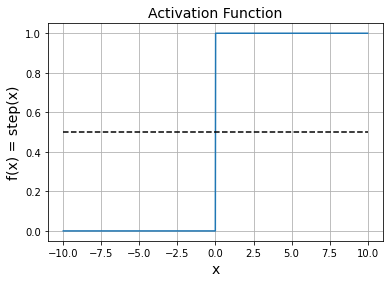

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)
y = x > 0

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x) = step(x)', fontsize=14)
plt.title('Activation Function', fontsize=14)
plt.plot(x, np.full(len(x), 0.5), '--k')
plt.show()

## Dataset

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = iris.target

X.shape, y.shape

((150, 2), (150,))

X.shape (150, 2) means we have two values ​​for each x (petal length and petal width) and 150 records

y.shape (150, ) means that we have a single value for each x ( cepal type ) and the same 150 records, these are the values ​​to predict

In [4]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
print ("Iris Features: ", iris.feature_names, "\n")
print (df.head(), "\n")

df = pd.DataFrame(iris.target, columns=['target'])
print ("Iris Classes: ", iris.target_names, "\n")
print (df.head())

Iris Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2 

Iris Classes:  ['setosa' 'versicolor' 'virginica'] 

   target
0       0
1       0
2       0
3       0
4       0


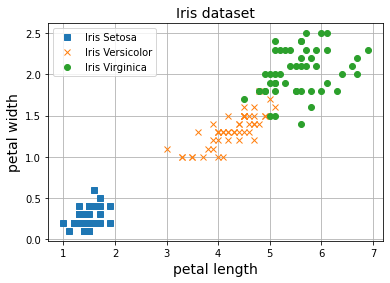

In [5]:
plt.plot(X[y==0, 0], X[y==0, 1], 's', label="Iris Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], 'x', label="Iris Versicolor")
plt.plot(X[y==2, 0], X[y==2, 1], 'o', label="Iris Virginica")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.title("Iris dataset", fontsize=14)
plt.show()

C:\Users\Killer\AppData\Local\Temp\ipykernel_9712\3361460998.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


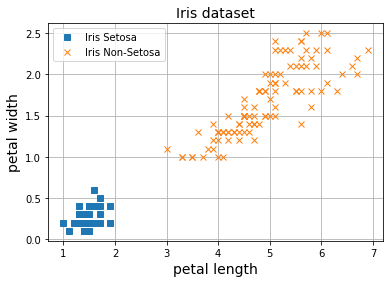

In [6]:
y = (iris.target == 0).astype(np.int)
# Since we only want a binary classification, 
# we transform the virginic irises and the versicolor into non-setosa

plt.plot(X[y==1, 0], X[y==1, 1], 's', label="Iris Setosa")
plt.plot(X[y==0, 0], X[y==0, 1], 'x', label="Iris Non-Setosa")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.title("Iris dataset", fontsize=14)
plt.show()

$$ \hat{y} = (w_0 + w_1 x_1 + ... + w_m x_m) $$

In [7]:
class Perceptron():
  def __init__(self, size):
    self.w = np.random.randn(size)  # random weights (size = number of features)
    self.ws = [] # list to save weights for animation
    
  def __call__(self, w, x):
    return np.dot(x, w) > 0 

  def fit(self, x, y, epochs, lr):
    #  we have 2 features, petal length and petal width
    #  we need to add a 1 feature more to multiply with bias (w0) (indepedent term)
    x = np.c_[np.ones(len(x)), x] # add constant term (value = 1) to multiply with bias
    for epoch in range(epochs):
        # Batch Gradient Descent
        y_hat = self(self.w, x) # self actuvate the __call__ method
        # Loss function (MSE)
        l = 0.5*(y_hat - y)**2
        # derivates of loss function
        dldh = (y_hat - y)
        dhdw = x
        dldw = np.dot(dldh, dhdw)
        # update weights
        self.w = self.w - lr*dldw
        # save weights for animation
        self.ws.append(self.w.copy())

np.random.seed(42)

perceptron = Perceptron(3) # 3 features total, 2 features + 1 bias
epochs, lr = 20, 0.01
perceptron.fit(X, y, epochs, lr)

In [8]:
from matplotlib import animation, rc
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
rc('animation', html='html5')

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
def plot(i, axes = [0, 5, 0, 2], label="Iris Setosa"):
    ax.clear()
    w = perceptron.ws[i]
    tit = ax.set_title(f"Epoch {i+1}", fontsize=14)
    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    X_new = np.c_[np.ones(len(X_new)), X_new] 
    y_predict = perceptron(w, X_new)
    zz = y_predict.reshape(x0.shape)
    ax.plot(X[y==0, 0], X[y==0, 1], "bs", label=f"No {label}")
    ax.plot(X[y==1, 0], X[y==1, 1], "yo", label=label)
    ax.contourf(x0, x1, zz, cmap=custom_cmap)
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="lower right", fontsize=14)
    ax.axis(axes)
    return ax

anim = animation.FuncAnimation(fig, plot, frames=epochs, interval=200)
plt.close()
anim

In [9]:
# last weights for prediction

w = perceptron.ws[-1]
w

array([ 2.36671415, -0.8222643 , -0.31731146])

In [10]:
x_new = [1, 2, 0.5]
y_pred = perceptron(w, x_new)
y_pred # Iris Setosa

True

In [11]:
x_new = [1, 4, 0.5]
y_pred = perceptron(w, x_new)
y_pred # Non-Iris Setosa

False

## Normalization

In [12]:
# normalize data between 0 and 1 (min-max normalization)

print(X.max(axis=0), X.min(axis=0))

X_norm = (X - X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

print(X_norm.max(axis=0), X_norm.min(axis=0))

[6.9 2.5] [1.  0.1]
[1. 1.] [0. 0.]


In [13]:
# normalize with mean value of 0 and standard deviation of 1 (standardization)

print(X.mean(axis=0), X.std(axis=0))

X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X_norm = (X - X_mean) / X_std

print(X_norm.mean(axis=0), X_norm.std(axis=0))

[3.758      1.19933333] [1.75940407 0.75969263]
[-4.26325641e-16 -4.73695157e-16] [1. 1.]


The normalization serves to improve the results of the training, both ways of normalizing are valid but depending on the scenario it can vary between mix-max normalization and standardization

In [14]:
np.random.seed(42)

perceptron = Perceptron(3)
epochs, lr = 20, 0.1
perceptron.fit(X_norm, y, epochs, lr)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
def plot(i, axes = [0, 5, 0, 2], label="Iris Setosa"):
    ax.clear()
    w = perceptron.ws[i]
    tit = ax.set_title(f"Epoch {i+1}", fontsize=14)
    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = (np.c_[x0.ravel(), x1.ravel()] - X_mean)/X_std
    X_new = np.c_[np.ones(len(X_new)), X_new] 
    y_predict = perceptron(w, X_new)
    zz = y_predict.reshape(x0.shape)
    ax.plot(X[y==0, 0], X[y==0, 1], "bs", label=f"No {label}")
    ax.plot(X[y==1, 0], X[y==1, 1], "yo", label=label)
    ax.contourf(x0, x1, zz, cmap=custom_cmap)
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="lower right", fontsize=14)
    ax.axis(axes)
    return ax

anim = animation.FuncAnimation(fig, plot, frames=epochs, interval=200)
plt.close()
anim

# Limitations of Perceptron

The perceptron is a linear classifier, which means that it can only separate linearly separable data. This means that the data must be linearly separable in the feature space. If the data is not linearly separable, the perceptron will not converge.

C:\Users\Killer\AppData\Local\Temp\ipykernel_9712\3039953915.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 1).astype(np.int)


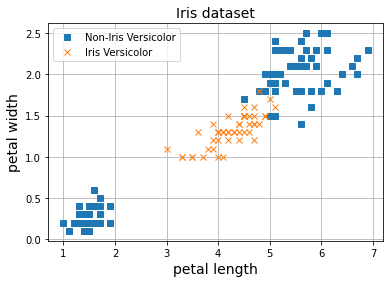

In [15]:
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 1).astype(np.int)

plt.plot(X[y==0, 0], X[y==0, 1], 's', label="Non-Iris Versicolor")
plt.plot(X[y==1, 0], X[y==1, 1], 'x', label="Iris Versicolor")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.title("Iris dataset", fontsize=14)
plt.show()

In [16]:
X_norm = (X - X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
np.random.seed(20)

perceptron = Perceptron(3)
epochs, lr = 40, 0.01
perceptron.fit(X_norm, y, epochs, lr)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
def plot(i, axes = [0.5, 7.3, 0, 2.8], label="Iris Versicolor"):
    ax.clear()
    w = perceptron.ws[i]
    tit = ax.set_title(f"Epoch {i+1}", fontsize=14)
    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = (np.c_[x0.ravel(), x1.ravel()] - X_mean)/X_std
    X_new = np.c_[np.ones(len(X_new)), X_new] 
    y_predict = perceptron(w, X_new)
    zz = y_predict.reshape(x0.shape)
    ax.plot(X[y==0, 0], X[y==0, 1], "bs", label=f"No {label}")
    ax.plot(X[y==1, 0], X[y==1, 1], "yo", label=label)
    ax.contourf(x0, x1, zz, cmap=custom_cmap)
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="lower right", fontsize=14)
    ax.axis(axes)
    return ax

anim = animation.FuncAnimation(fig, plot, frames=epochs, interval=200)
plt.close()
anim